# Logistic Regression

Breast cancer is one of the most common cancers among women worldwide, making early and accurate diagnosis critically important for treatment and management. This Jupyter notebook explores the application of logistic regression, a powerful statistical and machine learning technique, for predicting whether breast cancer is benign or malignant based on various diagnostic measurements. Logistic regression is a predictive analysis algorithm used primarily for binary classification problems. It models the probabilities of default classes (benign or malignant in this case) based on input features using a logistic function (or sigmoid function). This function outputs values between 0 and 1, which are then mapped to two classes.

### Dataset
The dataset used in this analysis is the Breast Cancer Wisconsin (Original) dataset, which is commonly used in predictive modeling. It includes features such as the thickness of the clump, uniformity of cell size and shape, marginal adhesion, and other cellular attributes.

### Sections of the Notebook

#### Section 1: Logistic Regression with Scikit-learn
This section will cover data preprocessing, model fitting, and evaluation using the high-level Scikit-learn library. We will explore how to effectively utilize this library to implement logistic regression in a few lines of code.

#### Section 2: Building Logistic Regression from Scratch
Here, we delve deeper into the mechanics of logistic regression. We'll manually implement functions for hypothesis representation, cost calculation, gradient computation, and parameter updates. This exercise will provide a foundational understanding of the algorithm and its optimization via gradient descent.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
np.set_printoptions(threshold=np.inf)

## Importing dataset

In [2]:
data = pd.read_csv("breast_cancer.csv")
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


## Preprocessing

### Checking for missing values

In [4]:
data.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Data Exploration

In [5]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


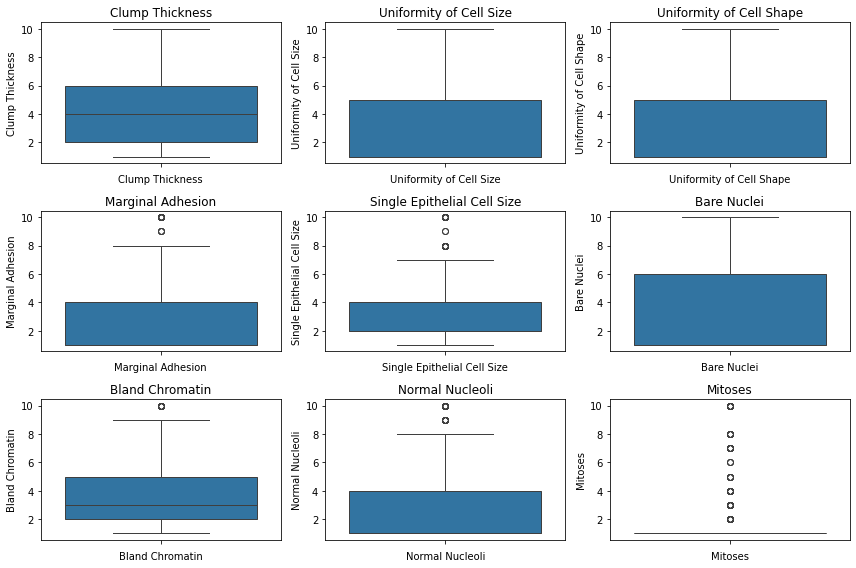

In [6]:
# draw boxplots to visualize outliers

plt.figure(figsize=(12,8))

for i in range(data.shape[1]-1):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=data, y=data.columns[i])
    plt.xlabel(data.columns[i])
    plt.title(data.columns[i])
plt.tight_layout()
plt.show()

### Replacing Class values

In [7]:
data["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [8]:
data["Class"].replace(2,0,inplace=True)
data["Class"].replace(4,1,inplace=True)

In [9]:
data["Class"].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [10]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


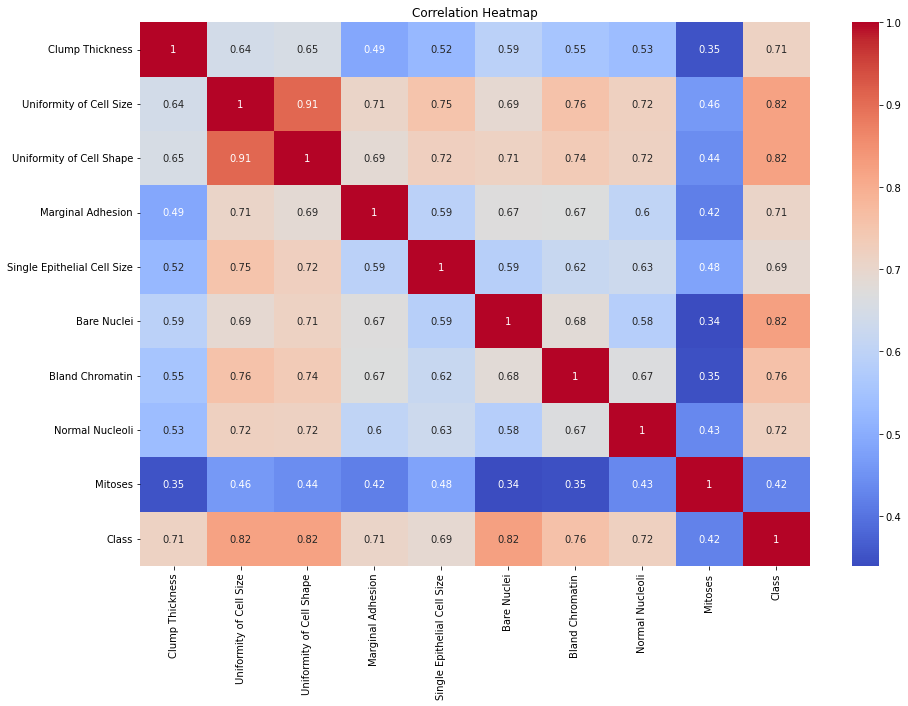

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Train Test Split

In [12]:
X = data.drop("Class", axis=1)
Y = data["Class"]

In [13]:
X.shape,Y.shape

((683, 9), (683,))

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=7)

In [15]:
x_train.shape,y_train.shape

((546, 9), (546,))

In [16]:
x_test.shape,y_test.shape

((137, 9), (137,))

### Converting Pandas DataFrame to NumPy Array

In [17]:
x_train,x_test = x_train.values,x_test.values

In [18]:
y_train,y_test = y_train.values,y_test.values

In [19]:
x_train.shape,y_train.shape

((546, 9), (546,))

In [20]:
x_test.shape,y_test.shape

((137, 9), (137,))

### Normalization

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
x_train.shape,x_test.shape

((546, 9), (137, 9))

## Section - 1

## Using scikit-learn

### Model Building

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

### Evaluating Train data

In [25]:
# Train data
np.concatenate((y_pred_train.reshape(-1,1),y_train.reshape(-1,1)), axis=1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

In [26]:
# Accuracy Score
acc_score = accuracy_score(y_train,y_pred_train)
f1_sc = f1_score(y_train,y_pred_train)

print(f"Accuracy = {acc_score}")
print(f"F1_Score = {f1_sc}")

Accuracy = 0.9743589743589743
F1_Score = 0.9633507853403142


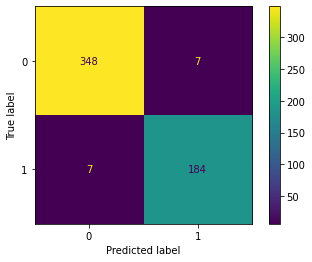

In [27]:
cm = confusion_matrix(y_train,y_pred_train, labels=model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_disp.plot()

In [28]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       355
           1       0.96      0.96      0.96       191

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546



### Evaluating test data

In [29]:
# Test data
np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)), axis=1)

array([[1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [30]:
# Accuracy Score
acc_score = accuracy_score(y_test,y_pred)
f1_sc = f1_score(y_test,y_pred)

print(f"Accuracy = {acc_score}")
print(f"F1_Score = {f1_sc}")

Accuracy = 0.9708029197080292
F1_Score = 0.9591836734693877


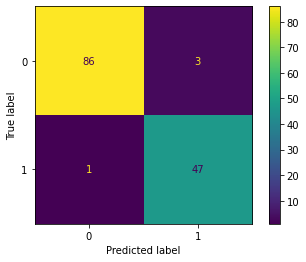

In [31]:
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_disp.plot()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



## Section - 2

## From Scratch

### Initializing the variables

In [34]:
X_train = x_train.T
X_test = x_test.T
Y_train = y_train.reshape(1,-1)
Y_test = y_test.reshape(1,-1)
W = np.zeros((X_train.shape[0],1))
b = 0
m = X_train.shape[1]

In [35]:
print("Shape of X_train =",X_train.shape)
print("Shape of Y_train =",Y_train.shape)
print("Shape of X_test =",X_test.shape)
print("Shape of Y_test =",Y_test.shape)
print("Shape of W =",W.shape)
print("No. of examples =",m)

Shape of X_train = (9, 546)
Shape of Y_train = (1, 546)
Shape of X_test = (9, 137)
Shape of Y_test = (1, 137)
Shape of W = (9, 1)
No. of examples = 546


In [36]:
alpha = 0.01
n = 100
J = []

### Hypothesis Function

In [38]:
def hypothesis(X,W,b):
    z = W.T.dot(X) + b
    return 1/(1+np.exp(-z))

### Cost Function

In [48]:
def cost_function(X,Y,W,b,m):
    cost = -(1/m)*np.sum(Y*np.log(hypothesis(X,W,b)) + (1-Y)*np.log(1-hypothesis(X,W,b)))
    return cost

### Gradient Descent

In [49]:
def compute_gradients(X,Y,W,b,m):
    dw = (1/m)*((hypothesis(X,W,b) - Y) @ X.T)
    db = (1/m)*np.sum(hypothesis(X,W,b) - Y)
    
    return dw,db

In [56]:
def gradient_descent(X,Y,W,b,m,n,alpha):
    
    print(f"\nCost at iteration-{0} =","{:.6}".format(cost_function(X,Y,W,b,m)))
    
    for i in range(1,n+1):
        dw,db = compute_gradients(X,Y,W,b,m)
        W -= alpha * dw.T
        b -= alpha * db
        
        cost = cost_function(X,Y,W,b,m)
        J.append(cost)
        
        if i%10 == 0:
            print(f"\nCost at iteration-{i} =","{:.6}".format(cost))
        
    return W,b

### Train Model

In [57]:
W,b = gradient_descent(X_train,Y_train,W,b,m,n,alpha)


Cost at iteration-0 = 0.190029

Cost at iteration-10 = 0.185219

Cost at iteration-20 = 0.180773

Cost at iteration-30 = 0.176652

Cost at iteration-40 = 0.172821

Cost at iteration-50 = 0.169251

Cost at iteration-60 = 0.165918

Cost at iteration-70 = 0.162799

Cost at iteration-80 = 0.159874

Cost at iteration-90 = 0.157125

Cost at iteration-100 = 0.154538
